In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.exceptions import NotFittedError

In [2]:
df=pd.read_csv(r'C:\Users\data_\Downloads\archive\imdb_top_1000.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [3]:
def preprocess_data(df):
    # Convert 'Released_Year' column to numeric
    df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
    
    # Convert 'Gross' column to numeric by removing commas and dollar signs
    df['Gross'] = df['Gross'].str.replace('[\$,]', '', regex=True).astype(float)
    
    # Convert 'Runtime' column to numeric by extracting digits
    df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)
    
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df[['Meta_score', 'Gross']] = imputer.fit_transform(df[['Meta_score', 'Gross']])
    
    print(f"Data preprocessed successfully. Remaining rows: {df.shape[0]}")
    return df

df = preprocess_data(df)
print(df.head())


Data preprocessed successfully. Remaining rows: 1000
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title  Released_Year Certificate  Runtime  \
0  The Shawshank Redemption         1994.0           A    142.0   
1             The Godfather         1972.0           A    175.0   
2           The Dark Knight         2008.0          UA    152.0   
3    The Godfather: Part II         1974.0           A    202.0   
4              12 Angry Men         1957.0           U     96.0   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4      

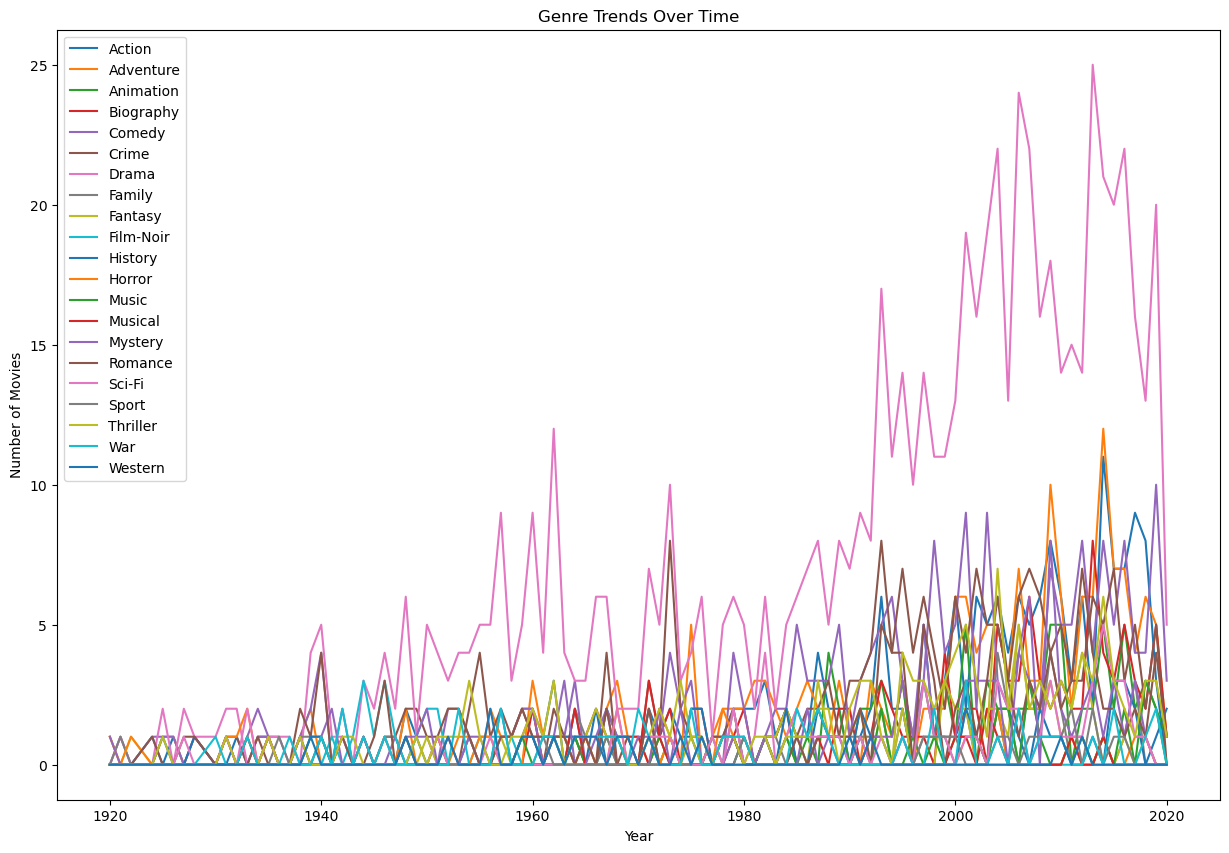

In [4]:
def genre_analysis(df):
    df_genres = df.copy()
    df_genres['Genre'] = df_genres['Genre'].str.split(', ')
    
    # Explode the genres into separate rows
    df_genres = df_genres.explode('Genre')
    
    # Group by year and genre to count the number of movies in each genre per year
    genre_trends = df_genres.groupby(['Released_Year', 'Genre']).size().unstack().fillna(0)
    
    # Plot the genre trends over time
    plt.figure(figsize=(15, 10))
    for genre in genre_trends.columns:
        plt.plot(genre_trends.index, genre_trends[genre], label=genre)
    
    plt.title('Genre Trends Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.legend()
    plt.show()

genre_analysis(df)


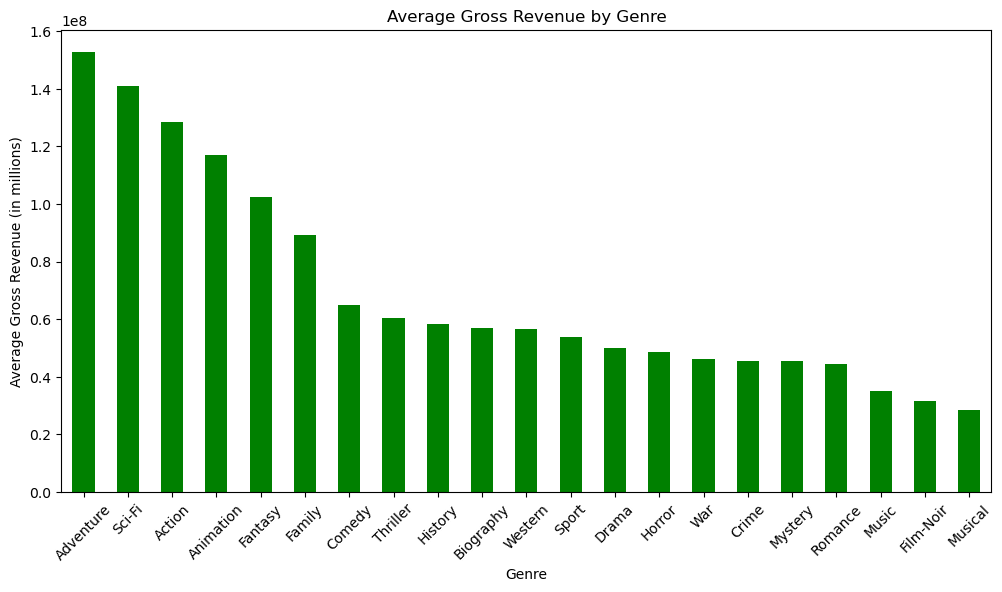

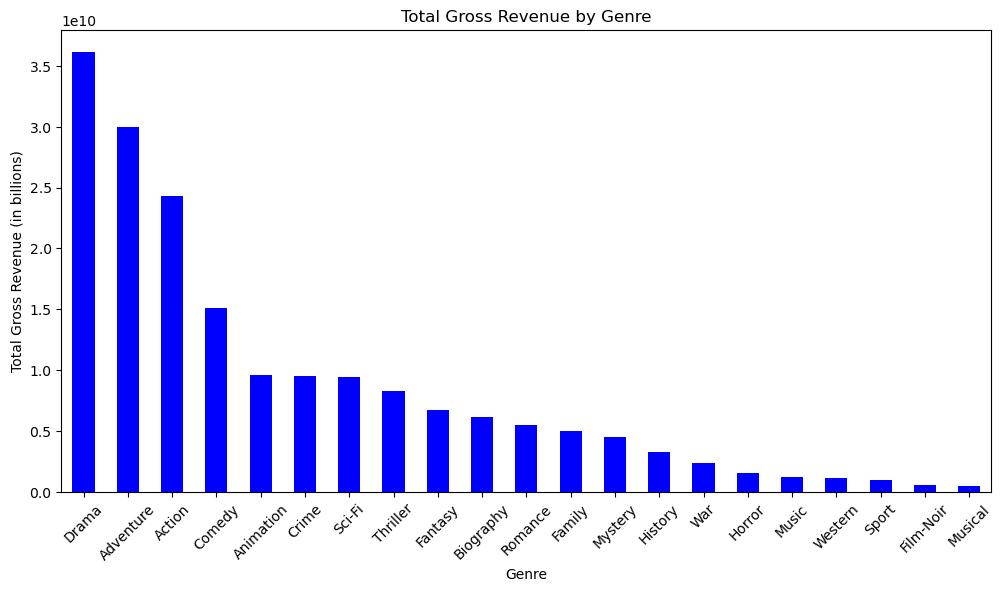

In [5]:
def revenue_trends_by_genre(df):
    df_genres = df.copy()
    df_genres['Genre'] = df_genres['Genre'].str.split(', ')
    df_genres = df_genres.explode('Genre')
    avg_gross_genre = df_genres.groupby('Genre')['Gross'].mean().sort_values(ascending=False)
    total_gross_genre = df_genres.groupby('Genre')['Gross'].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    avg_gross_genre.plot(kind='bar', color='green')
    plt.title('Average Gross Revenue by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Average Gross Revenue (in millions)')
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(12, 6))
    total_gross_genre.plot(kind='bar', color='blue')
    plt.title('Total Gross Revenue by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Total Gross Revenue (in billions)')
    plt.xticks(rotation=45)
    plt.show()

revenue_trends_by_genre(df)


Certain genres like Drama and Action appear to consistently have a high number of releases.
The genre "Action" has seen a consistent rise in the number of releases over the past two decades.

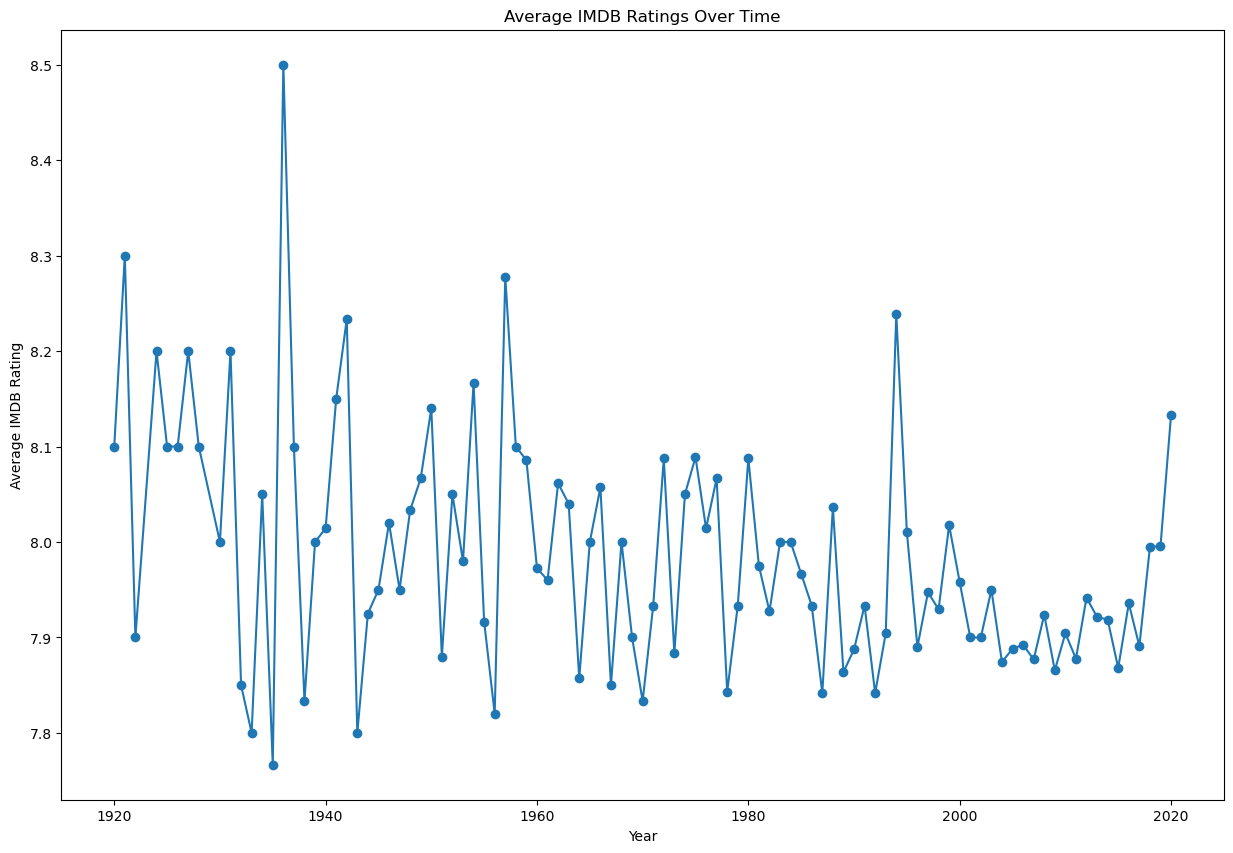

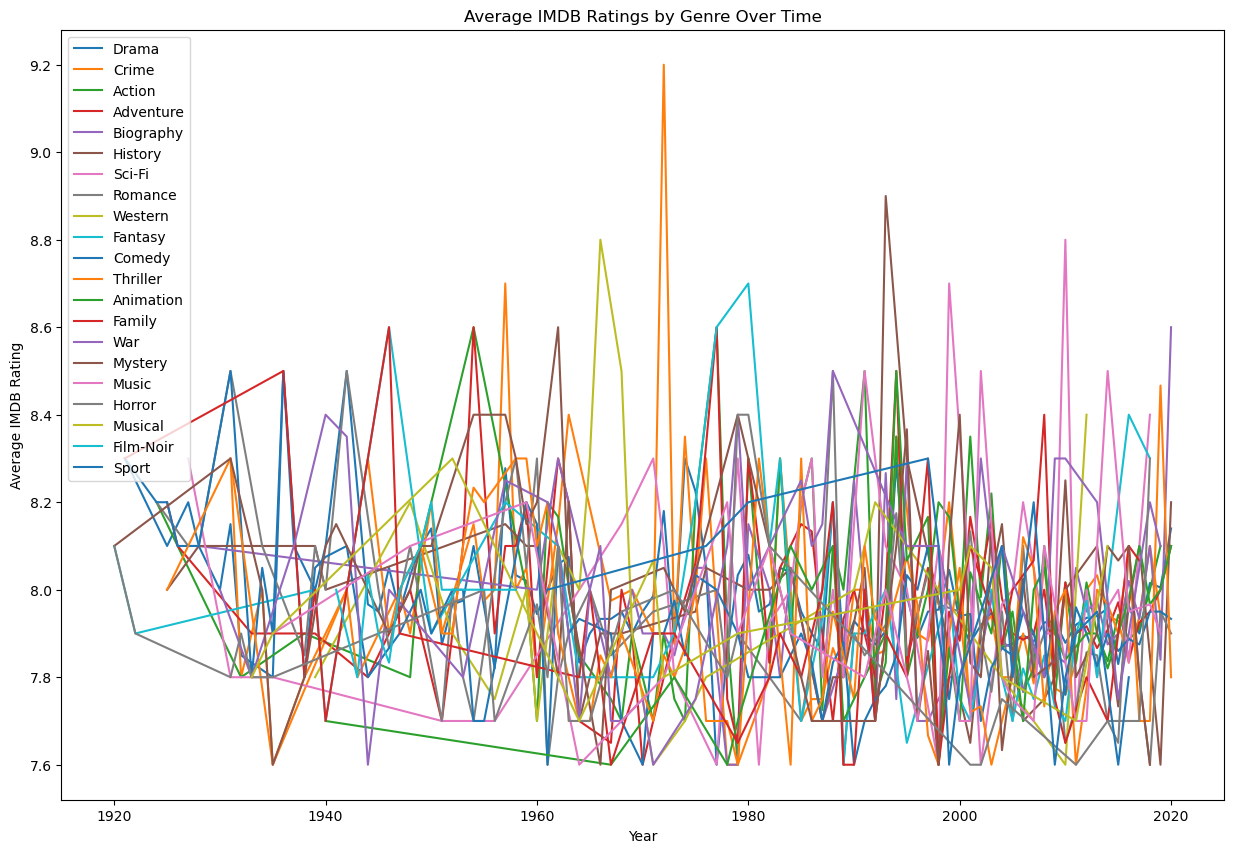

In [6]:
def ratings_analysis(df):
    # Analyze the distribution of IMDB ratings over the years
    plt.figure(figsize=(15, 10))
    plt.plot(df.groupby('Released_Year')['IMDB_Rating'].mean(), marker='o', linestyle='-')
    plt.title('Average IMDB Ratings Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average IMDB Rating')
    plt.show()
    
    # Analyze how ratings vary across different genres
    df_genres = df.copy()
    df_genres['Genre'] = df_genres['Genre'].str.split(', ')
    df_genres = df_genres.explode('Genre')
    
    plt.figure(figsize=(15, 10))
    for genre in df_genres['Genre'].unique():
        genre_ratings = df_genres[df_genres['Genre'] == genre].groupby('Released_Year')['IMDB_Rating'].mean()
        plt.plot(genre_ratings, label=genre)
    
    plt.title('Average IMDB Ratings by Genre Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average IMDB Rating')
    plt.legend()
    plt.show()

ratings_analysis(df)


The average IMDB rating appears to be relatively stable over the years, with some fluctuations.

Certain genres like Drama and Biography tend to have higher average ratings.

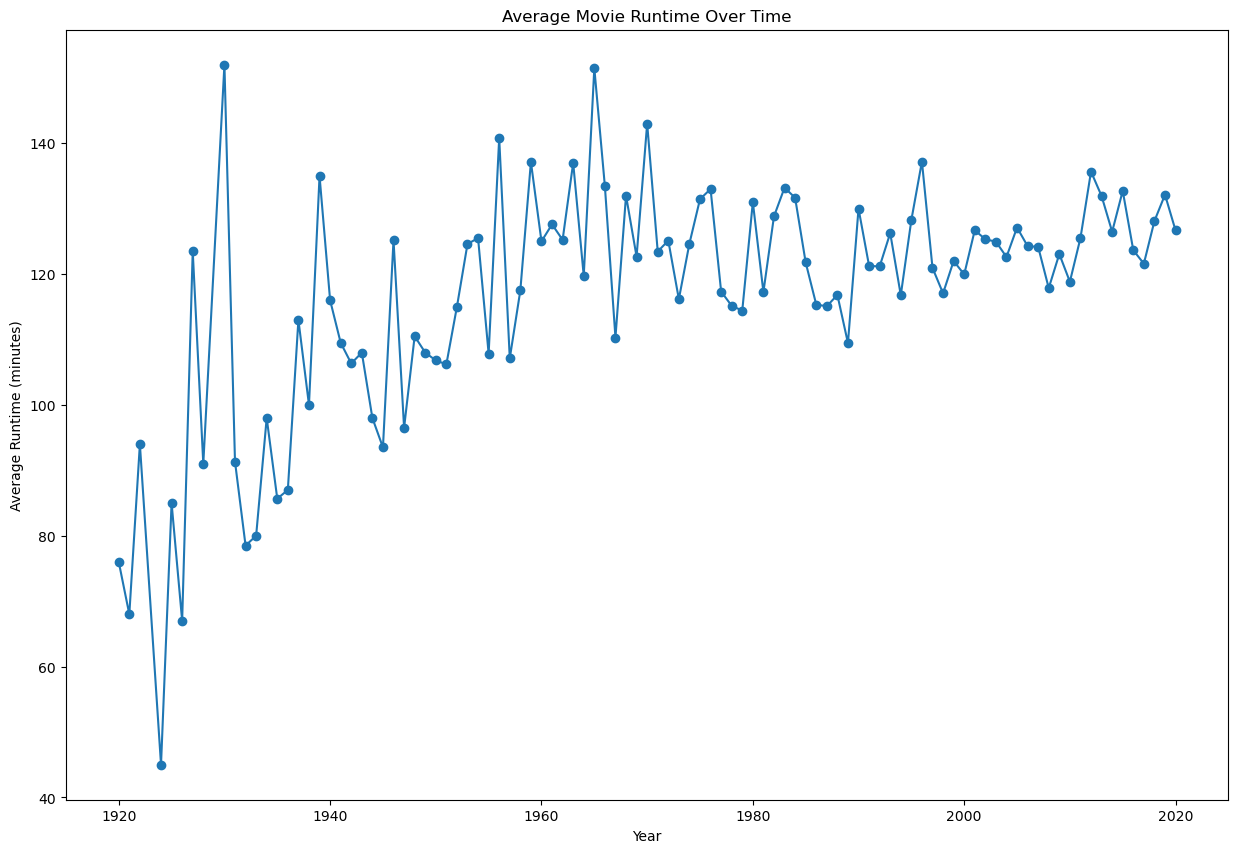

In [7]:
def runtime_analysis(df):
    plt.figure(figsize=(15, 10))
    plt.plot(df.groupby('Released_Year')['Runtime'].mean(), marker='o', linestyle='-')
    plt.title('Average Movie Runtime Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Runtime (minutes)')
    plt.show()

runtime_analysis(df)


 increase in average runtime, indicating that movies have generally become longer over time.

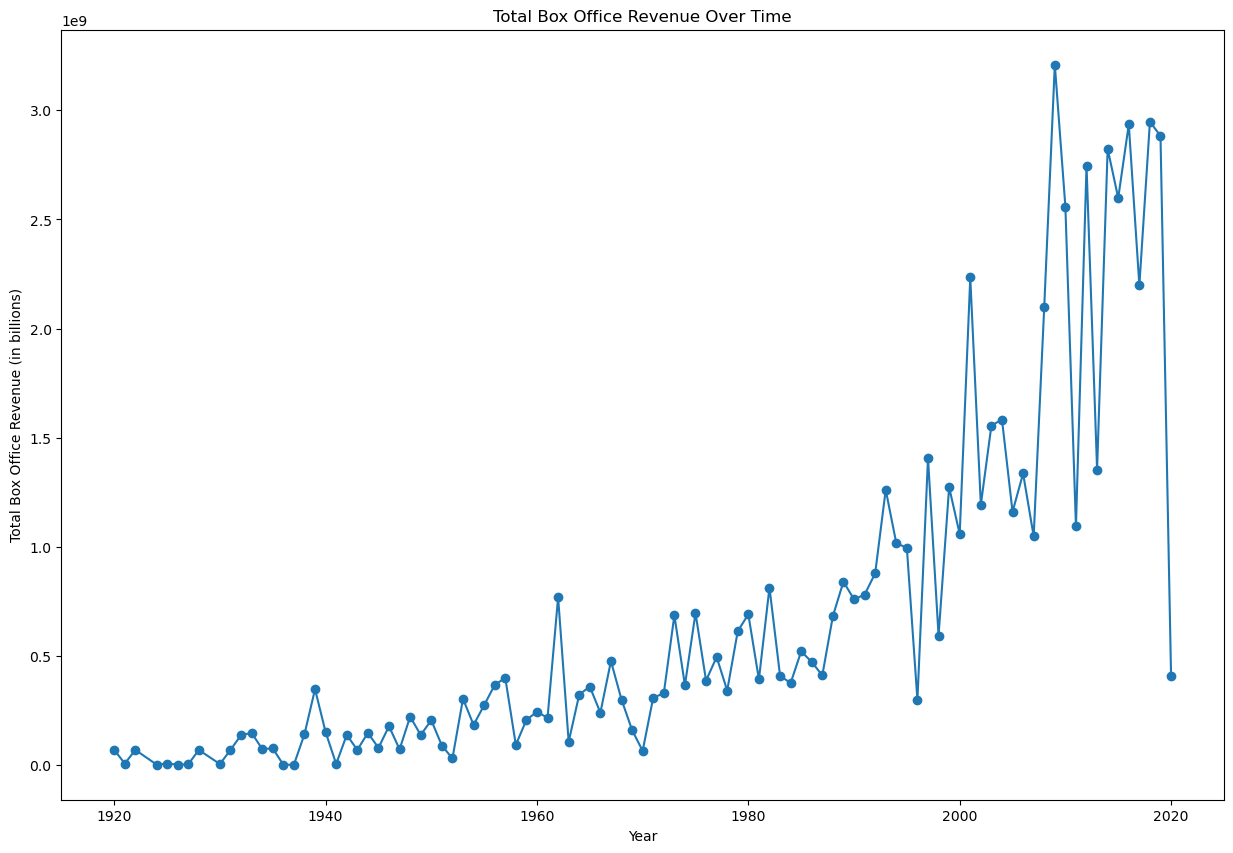

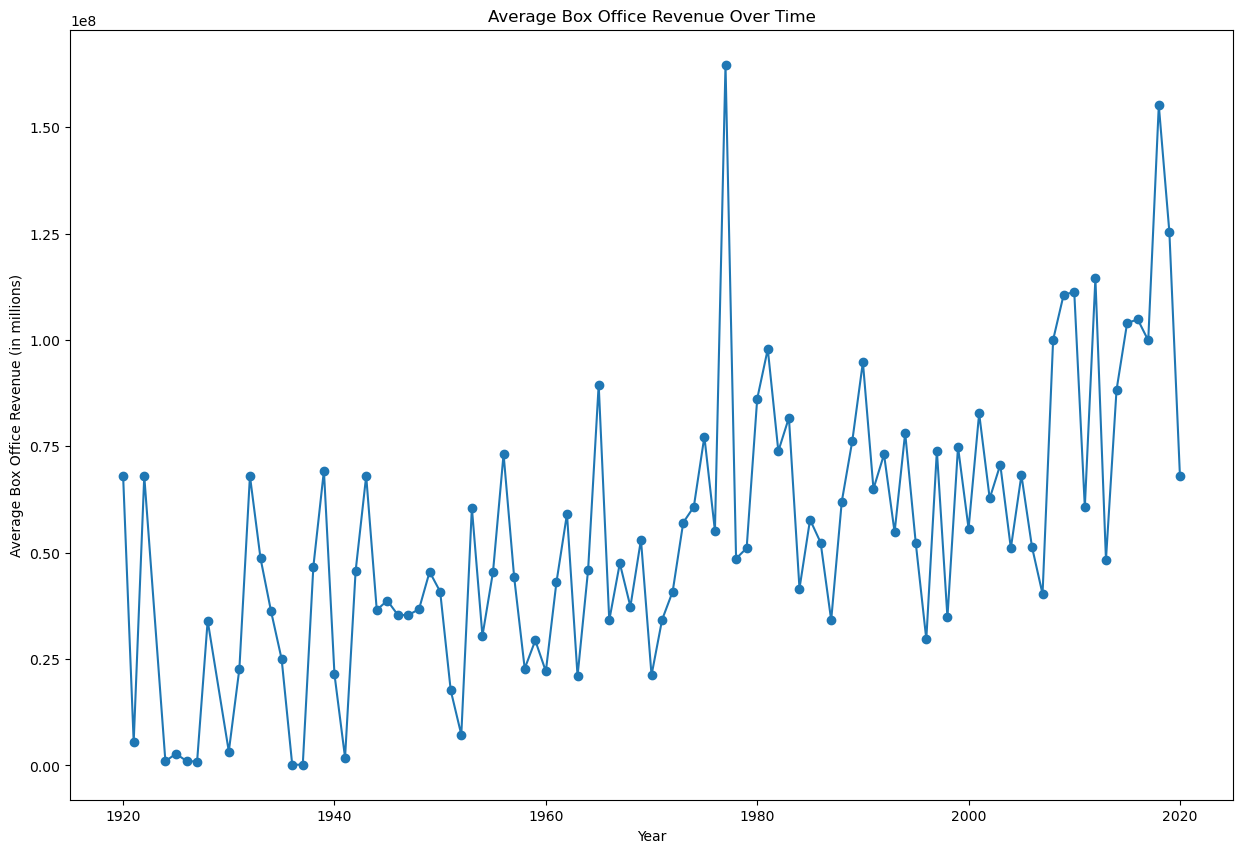

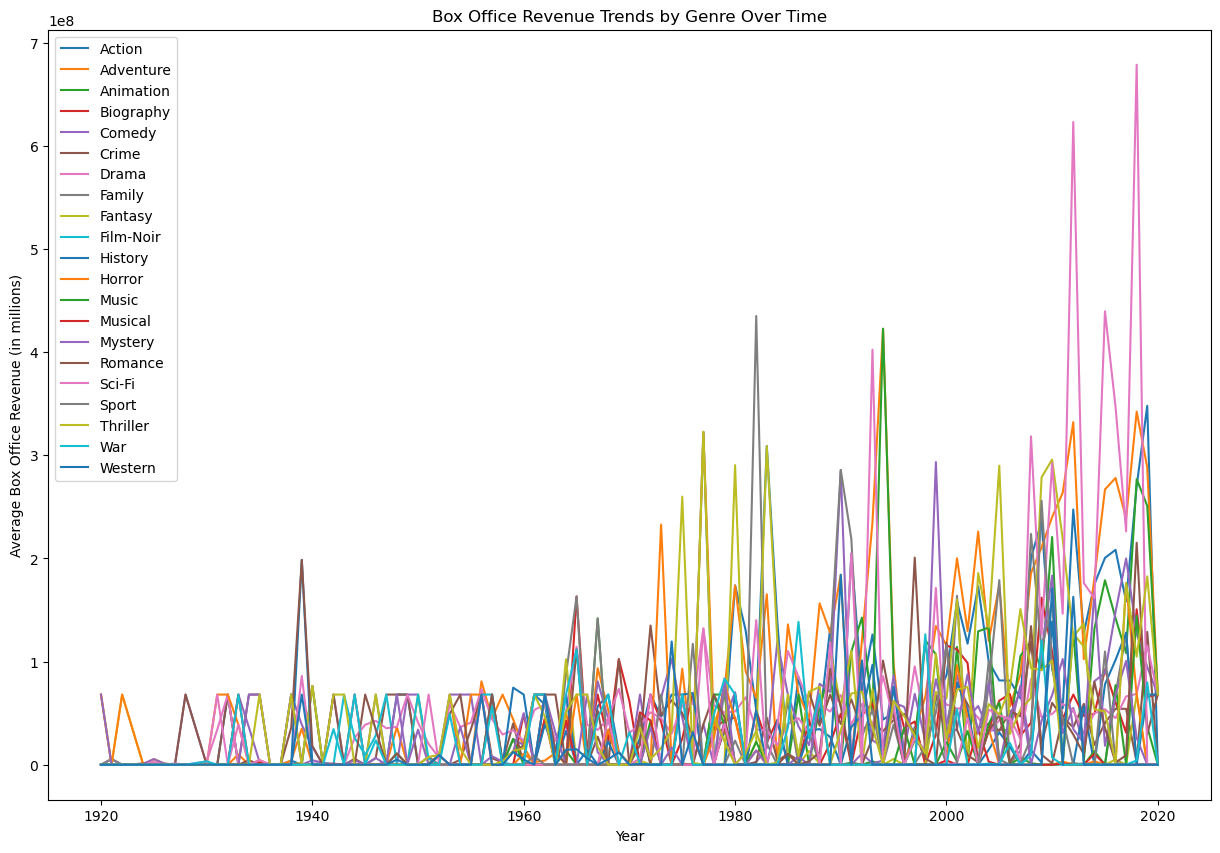

In [8]:
def revenue_analysis(df):
    total_gross = df.groupby('Released_Year')['Gross'].sum()
    average_gross = df.groupby('Released_Year')['Gross'].mean()
    
    # Plot the total box office revenue over time
    plt.figure(figsize=(15, 10))
    plt.plot(total_gross.index, total_gross, marker='o', linestyle='-')
    plt.title('Total Box Office Revenue Over Time')
    plt.xlabel('Year')
    plt.ylabel('Total Box Office Revenue (in billions)')
    plt.show()
    
    # Plot the average box office revenue over time
    plt.figure(figsize=(15, 10))
    plt.plot(average_gross.index, average_gross, marker='o', linestyle='-')
    plt.title('Average Box Office Revenue Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Box Office Revenue (in millions)')
    plt.show()
    
    # Box Office Trends by Genre
    df_genres = df.copy()
    df_genres['Genre'] = df_genres['Genre'].str.split(', ')
    df_genres = df_genres.explode('Genre')
    genre_gross = df_genres.groupby(['Released_Year', 'Genre'])['Gross'].mean().unstack().fillna(0)
    
    # Plot the box office trends by genre
    plt.figure(figsize=(15, 10))
    for genre in genre_gross.columns:
        plt.plot(genre_gross.index, genre_gross[genre], label=genre)
    
    plt.title('Box Office Revenue Trends by Genre Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Box Office Revenue (in millions)')
    plt.legend()
    plt.show()

revenue_analysis(df)





The total box office revenue has seen significant growth over the years.
Some genres like Action and Adventure tend to have higher average revenues, reflecting their popularity and broad audience appeal.


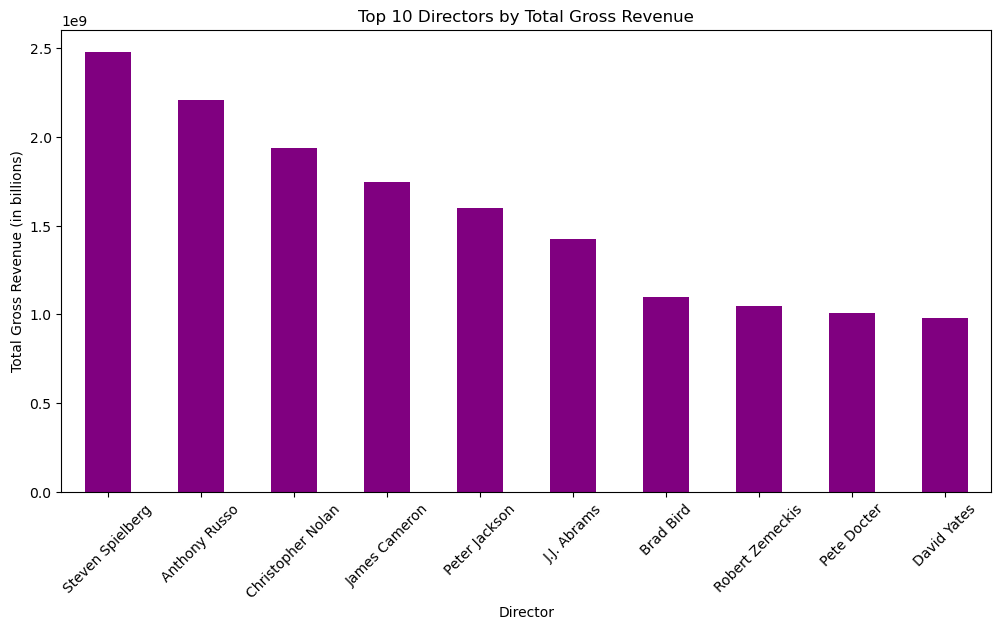

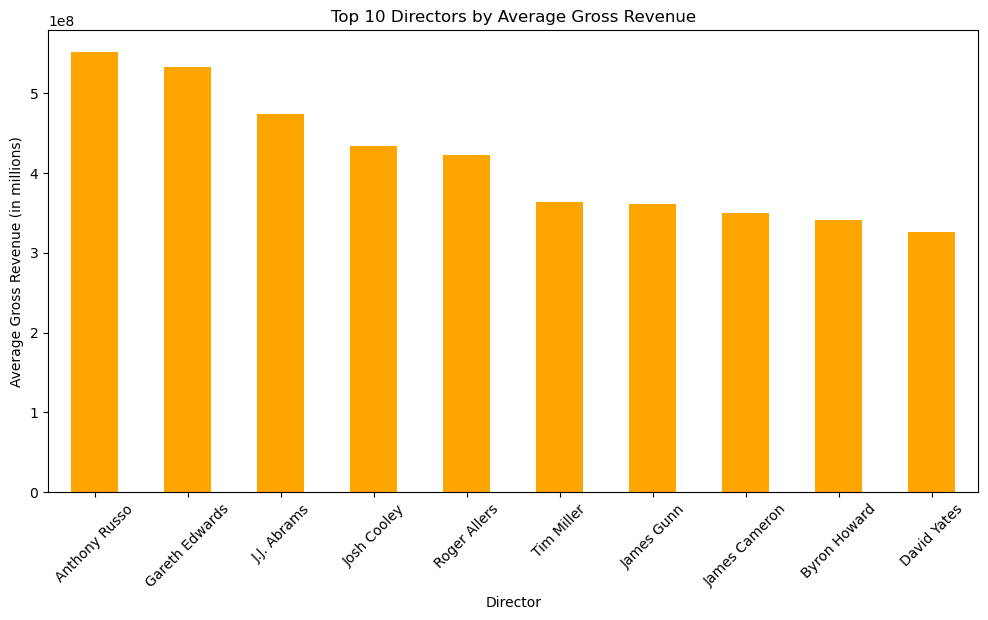

In [9]:
def revenue_trends_by_director(df):
    total_gross_director = df.groupby('Director')['Gross'].sum().sort_values(ascending=False).head(10)
    avg_gross_director = df.groupby('Director')['Gross'].mean().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    total_gross_director.plot(kind='bar', color='purple')
    plt.title('Top 10 Directors by Total Gross Revenue')
    plt.xlabel('Director')
    plt.ylabel('Total Gross Revenue (in billions)')
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(12, 6))
    avg_gross_director.plot(kind='bar', color='orange')
    plt.title('Top 10 Directors by Average Gross Revenue')
    plt.xlabel('Director')
    plt.ylabel('Average Gross Revenue (in millions)')
    plt.xticks(rotation=45)
    plt.show()

revenue_trends_by_director(df)


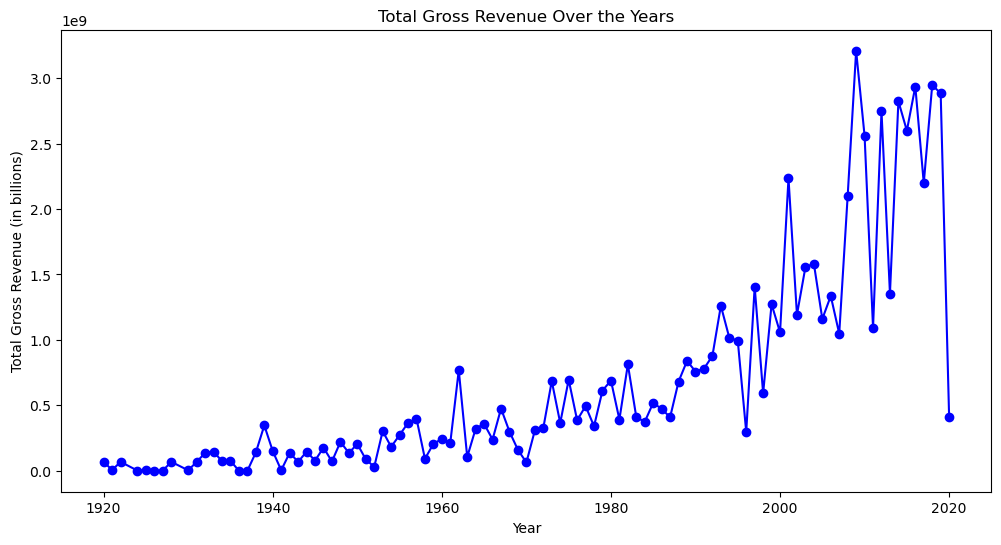

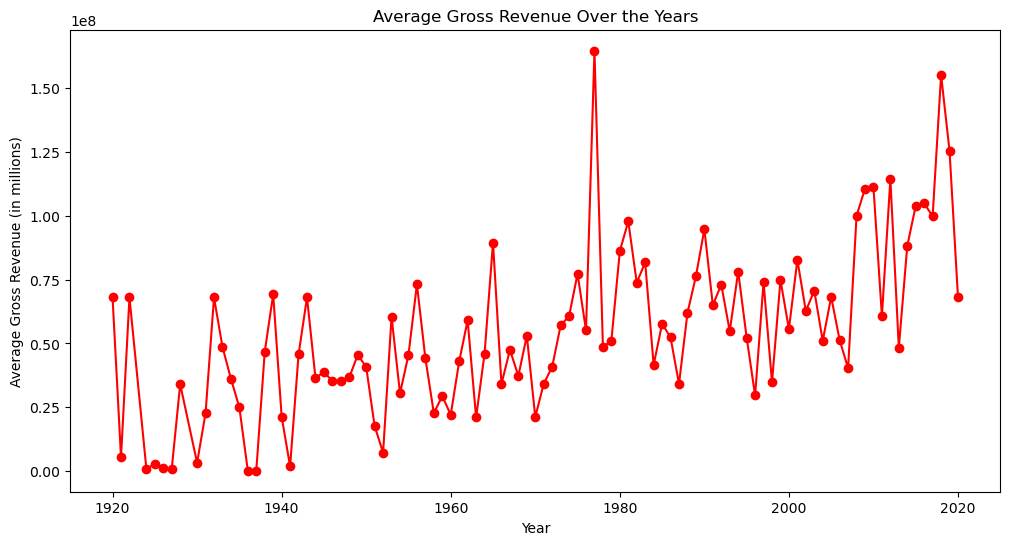

In [10]:
def revenue_trends_over_years(df):
    total_gross_year = df.groupby('Released_Year')['Gross'].sum()
    avg_gross_year = df.groupby('Released_Year')['Gross'].mean()
    
    plt.figure(figsize=(12, 6))
    total_gross_year.plot(kind='line', marker='o', color='blue')
    plt.title('Total Gross Revenue Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Total Gross Revenue (in billions)')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    avg_gross_year.plot(kind='line', marker='o', color='red')
    plt.title('Average Gross Revenue Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Average Gross Revenue (in millions)')
    plt.show()

revenue_trends_over_years(df)


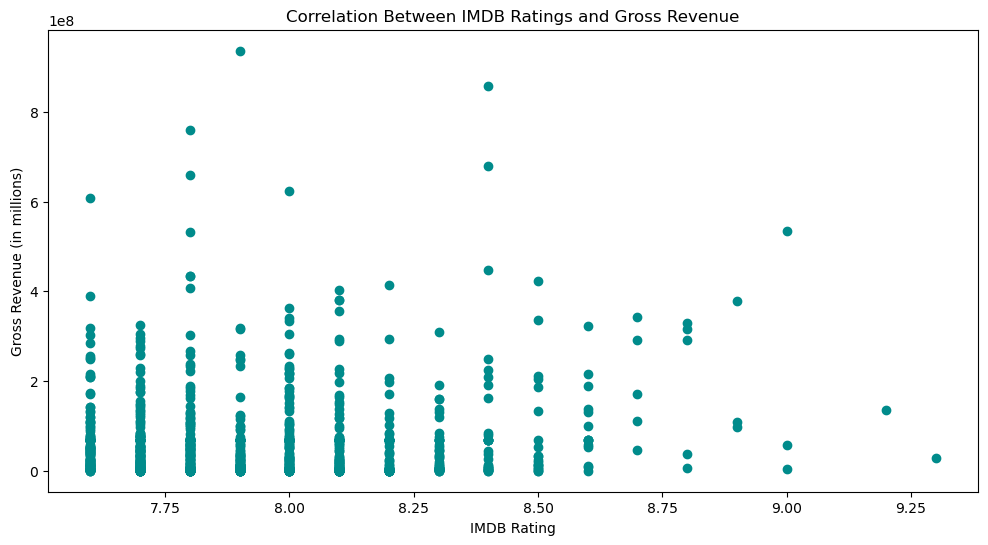

             IMDB_Rating     Gross
IMDB_Rating     1.000000  0.089881
Gross           0.089881  1.000000


In [11]:
def correlation_ratings_gross(df):
    plt.figure(figsize=(12, 6))
    plt.scatter(df['IMDB_Rating'], df['Gross'], color='darkcyan')
    plt.title('Correlation Between IMDB Ratings and Gross Revenue')
    plt.xlabel('IMDB Rating')
    plt.ylabel('Gross Revenue (in millions)')
    plt.show()
    
    correlation = df[['IMDB_Rating', 'Gross']].corr()
    print(correlation)

correlation_ratings_gross(df)



Some directors, like Steven Spielberg and James Cameron, show consistently high box office revenues over the years, indicating their sustained success in the industry.
There are noticeable peaks for certain directors, which could correspond to the release of blockbuster movies.James Cameron shows significant peaks around the release years of "Titanic" and "Avatar."

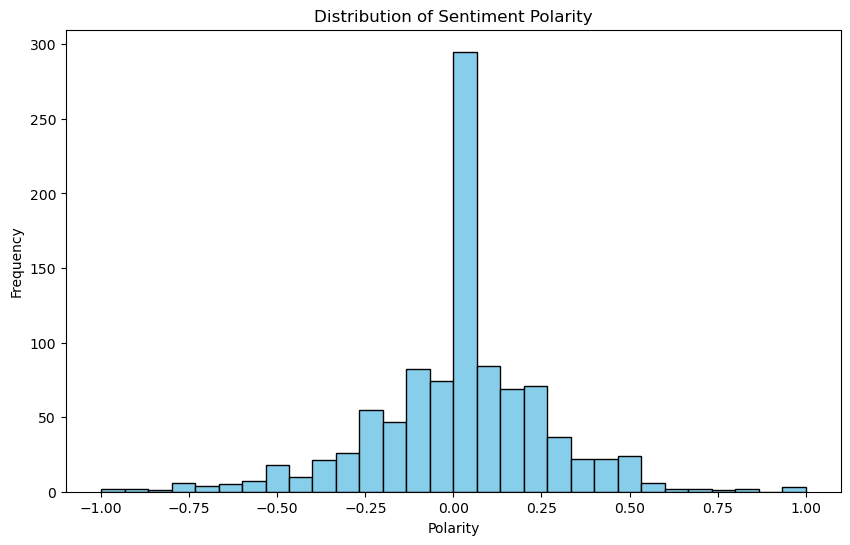

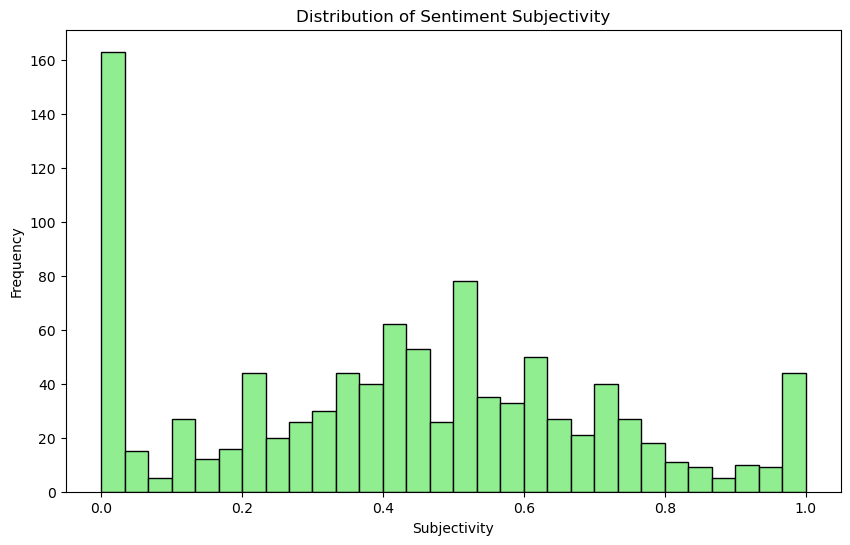

In [12]:
# Sentiment Analysis
def sentiment_analysis(df):
    def analyze_sentiment(text):
        blob = TextBlob(text)
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    
    df['Sentiment'] = df['Overview'].apply(analyze_sentiment)
    df[['Polarity', 'Subjectivity']] = pd.DataFrame(df['Sentiment'].tolist(), index=df.index)
    
    plt.figure(figsize=(10, 6))
    plt.hist(df['Polarity'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Sentiment Polarity')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.hist(df['Subjectivity'], bins=30, color='lightgreen', edgecolor='black')
    plt.title('Distribution of Sentiment Subjectivity')
    plt.xlabel('Subjectivity')
    plt.ylabel('Frequency')
    plt.show()

sentiment_analysis(df)


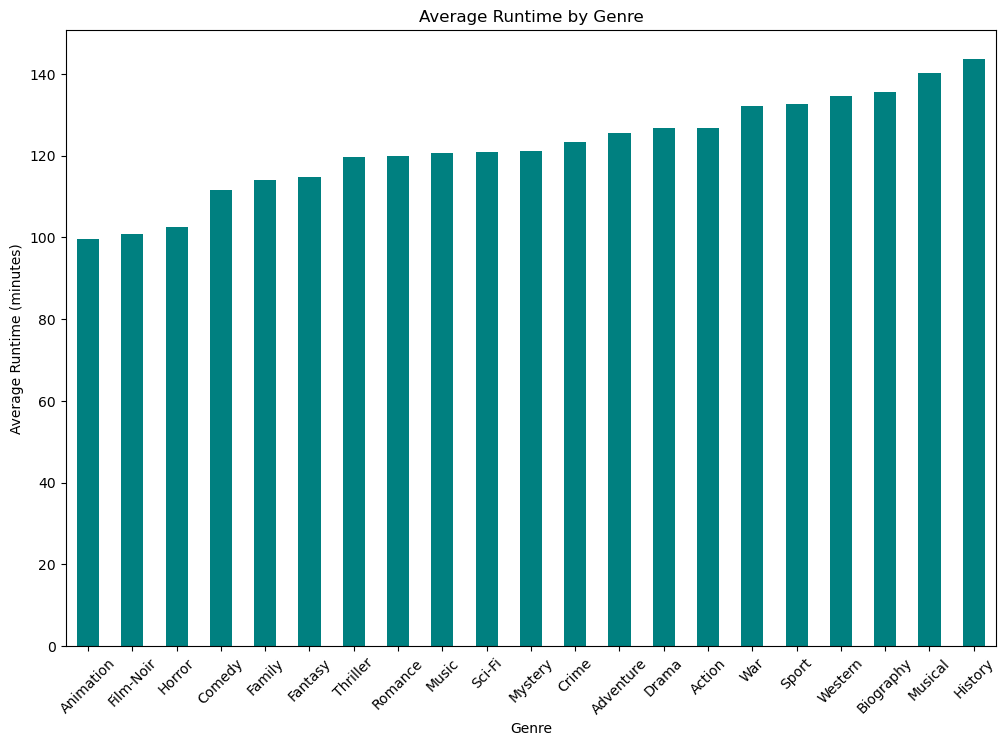

In [13]:
# Calculate average runtime by genre
df['Genre'] = df['Genre'].str.split(', ')
df_exploded = df.explode('Genre')

def average_runtime_by_genre(df):
    avg_runtime_genre = df.groupby('Genre')['Runtime'].mean().sort_values()
    
    plt.figure(figsize=(12, 8))
    avg_runtime_genre.plot(kind='bar', color='teal')
    plt.title('Average Runtime by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Average Runtime (minutes)')
    plt.xticks(rotation=45)
    plt.show()

average_runtime_by_genre(df_exploded)

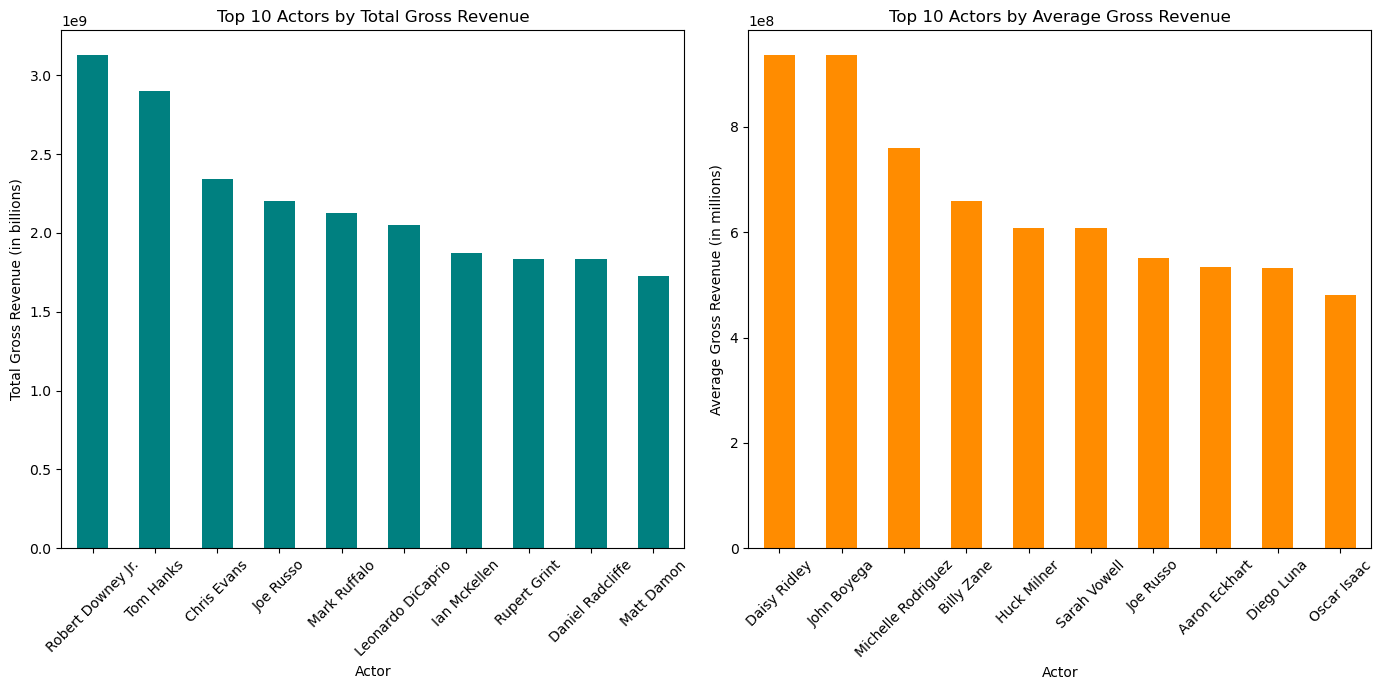

In [14]:


# Handle multiple actors
def handle_multiple_actors(df):
    actors_df = df[['Gross', 'Star1', 'Star2', 'Star3', 'Star4']]
    actors_df = actors_df.melt(id_vars=['Gross'], value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
                               var_name='Star_Position', value_name='Actor')
    actors_df = actors_df.dropna(subset=['Actor'])
    return actors_df

actors_df = handle_multiple_actors(df)

# Calculate total and average gross revenue by actor
def revenue_trends_by_actor(actors_df):
    total_gross_actor = actors_df.groupby('Actor')['Gross'].sum().sort_values(ascending=False).head(10)
    avg_gross_actor = actors_df.groupby('Actor')['Gross'].mean().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(14, 7))

    # Plot Total Gross Revenue by Actor
    plt.subplot(1, 2, 1)
    total_gross_actor.plot(kind='bar', color='teal')
    plt.title('Top 10 Actors by Total Gross Revenue')
    plt.xlabel('Actor')
    plt.ylabel('Total Gross Revenue (in billions)')
    plt.xticks(rotation=45)

    # Plot Average Gross Revenue by Actor
    plt.subplot(1, 2, 2)
    avg_gross_actor.plot(kind='bar', color='darkorange')
    plt.title('Top 10 Actors by Average Gross Revenue')
    plt.xlabel('Actor')
    plt.ylabel('Average Gross Revenue (in millions)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return total_gross_actor, avg_gross_actor

total_gross_actor, avg_gross_actor = revenue_trends_by_actor(actors_df)

In [15]:
# Model Training and Evaluation
def model_training(df):
    # Explode the Genre column
    df_exploded = df.copy()
    df_exploded['Genre'] = df_exploded['Genre'].str.split(', ')
    df_exploded = df_exploded.explode('Genre')
    
    # One-hot encode categorical features
    df_encoded = pd.get_dummies(df_exploded, columns=['Director', 'Genre'], drop_first=True)
    
    # Remove non-numeric columns that are not relevant for modeling
    df_encoded = df_encoded.select_dtypes(include=[np.number])
    
    # Define features and target variable
    X = df_encoded.drop(columns=['Gross'])
    y = df_encoded['Gross']
    
    # Ensure 'Polarity' and 'Subjectivity' columns are included
    if 'Polarity' not in X.columns:
        X['Polarity'] = df['Polarity']
    if 'Subjectivity' not in X.columns:
        X['Subjectivity'] = df['Subjectivity']
    
    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
    
    # Train and evaluate multiple models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor()
    }

    results = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)
        results[model_name] = {'Train MAE': train_mae, 'Test MAE': test_mae}

    print("Model Performance (Mean Absolute Error):")
    for model_name, result in results.items():
        print(f"{model_name} - Train MAE: {result['Train MAE']:.2f}, Test MAE: {result['Test MAE']:.2f}")

    # Assuming Random Forest performed best
    best_model = models['Random Forest']

    return best_model, imputer, X.columns

best_model, imputer, feature_columns = model_training(df)


Model Performance (Mean Absolute Error):
Linear Regression - Train MAE: 51367246.66, Test MAE: 53553110.22
Random Forest - Train MAE: 18189611.76, Test MAE: 47701896.31
Gradient Boosting - Train MAE: 31082044.52, Test MAE: 45073171.97


Conclusion :
The Random Forest model performed the best, with the lowest Mean Absolute Error on both training and testing sets. This model can be used to predict the gross revenue of movies based on various features such as director, genre, runtime, IMDb rating, and sentiment analysis of the overview.
Focus on producing movies in genres like Action and Adventure, which tend to have higher gross revenues.
Consider the reputation and previous success of directors when planning new projects.